In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from pyproj import CRS, Transformer
from rasterio.warp import reproject, Resampling, CRS
import pyproj

In [36]:
#LOAD RASTER DATA
#from rasterio import features
with rasterio.open('src_raster/prev_data_cropped.tif') as data_prev:
    rband_prev = data_prev.read(1).astype(np.float32)
    gband_prev = data_prev.read(2).astype(np.float32)
    bband_prev = data_prev.read(3).astype(np.float32)
    meta_prev = data_prev.meta
    meta_prev['nodata'] = None
    
with rasterio.open('src_raster/yellow.tif') as data_yellow:
    rband_yellow = data_yellow.read(1).astype(np.float32)
    gband_yellow = data_yellow.read(2).astype(np.float32)
    bband_yellow = data_yellow.read(3).astype(np.float32)
    meta_yellow = data_yellow.meta
    
with rasterio.open('src_raster/green.tif') as data_green:
    rband_green = data_green.read(1).astype(np.float32)
    gband_green = data_green.read(2).astype(np.float32)
    bband_green = data_green.read(3).astype(np.float32)
    meta_green = data_green.meta

In [37]:
meta_prev

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 11455,
 'height': 11913,
 'count': 4,
 'crs': CRS.from_epsg(32651),
 'transform': Affine(0.01127351374945281, 0.0, 811453.1567,
        0.0, -0.01127351632670164, 816606.4989)}

In [5]:
nodata = -9999

In [46]:
#VARI on PREV DATA
den_prev = gband_prev + rband_prev - bband_prev
den_prev = np.where(np.isclose(den_prev, 0), 1e-1, den_prev)  # Avoid division by nearly zero
vari_prev = (gband_prev - rband_prev) / den_prev
# Replace NaN values with nodata
vari_prev[np.isnan(vari_prev)] = meta_prev['nodata']
vari_prev[vari_prev==0] = meta_prev['nodata']
vari_prev = np.clip(vari_prev, -1, 1)

In [47]:
#VARI on YELLOW DATA
den_yellow = gband_yellow + rband_yellow - bband_yellow
den_yellow = np.where(np.isclose(den_yellow, 0), 1e-1, den_yellow)  # Avoid division by nearly zero
vari_yellow = (gband_yellow - rband_yellow) / den_yellow
# Replace NaN values with nodata
vari_yellow[np.isnan(vari_yellow)] = meta_yellow['nodata']
vari_yellow[vari_yellow==0] = meta_yellow['nodata']
vari_yellow = np.clip(vari_yellow, -1, 1)

In [48]:
#VARI on GREEN DATA
den_green = gband_green + rband_green - bband_green
den_green = np.where(np.isclose(den_green, 0), 1e-1, den_green)  # Avoid division by nearly zero
vari_green = (gband_green - rband_green) / den_green
# Replace NaN values with nodata
vari_green[np.isnan(vari_green)] = meta_green['nodata']
vari_green[vari_green==0] = meta_green['nodata']
vari_green = np.clip(vari_green, -1, 1)

In [ ]:
#GLI
gli_denominator = 2 * green_band + red_band + blue_band
gli_denominator = np.where(np.isclose(gli_denominator, 0), 1e-1, gli_denominator)
gli = (2* green_band - red_band - blue_band)/ gli_denominator

# Replace NaN values with nodata
gli[np.isnan(gli)] = nodata
gli[gli== 0] = nodata

gli = np.clip(gli, -1, 1)

In [54]:
#ExG
exg_prev = 2 * gband_prev - rband_prev - bband_prev
exg_prev[np.isnan(exg_prev)] = meta_prev['nodata']
exg_prev[exg_prev==0] = -9999

exg_yellow  = 2 * gband_yellow - rband_yellow - bband_yellow
exg_yellow[np.isnan(exg_yellow)] =  meta_yellow['nodata']
exg_yellow[exg_yellow==0] = meta_yellow['nodata']

exg_green =  2 * gband_green - rband_green - bband_green
exg_green[np.isnan(exg_green)] =  meta_green['nodata']
exg_green[exg_green==0] = meta_green['nodata']

In [59]:
np.max(exg_prev)

235.0

(array([6.000000e+00, 1.100000e+01, 9.000000e+00, 1.000000e+01,
        7.000000e+00, 7.000000e+00, 1.200000e+01, 6.000000e+00,
        1.200000e+01, 1.600000e+01, 1.800000e+01, 2.000000e+01,
        2.300000e+01, 3.900000e+01, 3.100000e+01, 4.300000e+01,
        4.900000e+01, 8.200000e+01, 7.000000e+01, 7.700000e+01,
        9.600000e+01, 9.800000e+01, 1.190000e+02, 1.530000e+02,
        2.050000e+02, 2.170000e+02, 3.980000e+02, 4.350000e+02,
        7.780000e+02, 1.687000e+03, 3.459000e+03, 7.127000e+03,
        1.297500e+04, 3.705900e+04, 7.086800e+04, 1.579670e+05,
        3.460030e+05, 6.338090e+05, 1.170791e+06, 2.039898e+06,
        3.599005e+06, 2.972098e+06, 3.924612e+06, 3.493482e+06,
        2.853630e+06, 2.369787e+06, 2.878112e+06, 2.293894e+06,
        2.471891e+06, 2.697454e+06, 3.133388e+06, 3.736267e+06,
        4.464357e+06, 7.018166e+06, 6.628537e+06, 7.592847e+06,
        7.555533e+06, 7.728823e+06, 7.189407e+06, 6.350378e+06,
        6.933054e+06, 4.299682e+06, 3.51

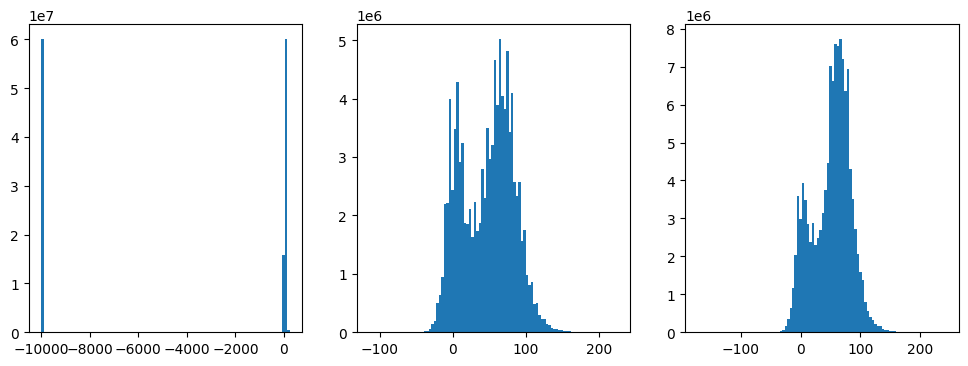

In [56]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.hist(exg_prev.flatten(), bins=100)
a2.hist(exg_yellow.flatten(), bins=100 )
a3.hist(exg_green.flatten(), bins=100)

In [ ]:
# data prev
new_tiff_profile = data_prev.profile  # Copy the profile from the original dataset
new_tiff_profile.update(
            dtype=rasterio.float32,  # Update the data type to match the VARI data
                        count=1,  # Only one band for VARI
                        compress='lzw',  # You can choose a compression method if needed
                        tiled=False,
                        blockysize=1,
                        nodata=-9999.9
)
new_crs = pyproj.CRS.from_epsg(32651)
new_tiff_profile.update(crs=new_crs)


Text(0.5, 0, 'Min: nan - Mean:nan - Max:nan')

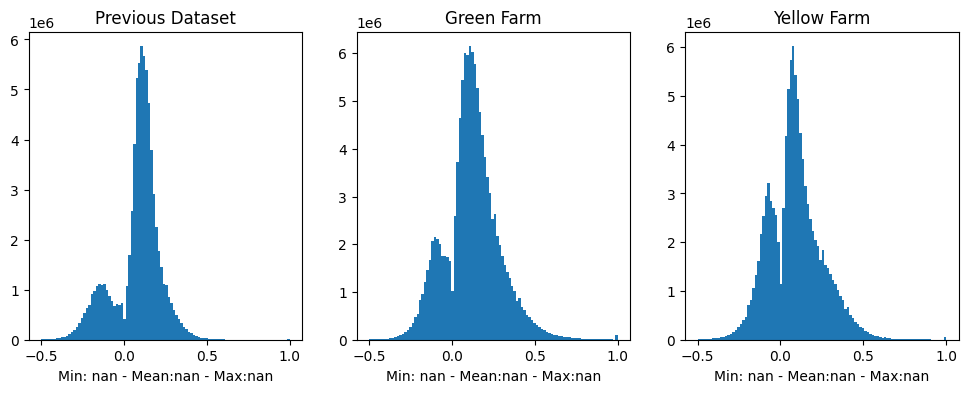

In [49]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.hist(vari_prev.flatten(), bins=100, range=(-0.5,1))
a1.set_title('Previous Dataset')
a1.set_xlabel(f'Min: {np.min(vari_prev):.2f} - Mean:{np.mean(vari_prev):.2f} - Max:{np.max(vari_prev):.2f}')

a2.hist(vari_green.flatten(), bins=100,range=(-0.5,1))
a2.set_title('Green Farm')
a2.set_xlabel(f'Min: {np.min(vari_green):.2f} - Mean:{np.mean(vari_green):.2f} - Max:{np.max(vari_green):.2f}')

a3.hist(vari_yellow.flatten(), bins=100,range=(-0.5,1))
a3.set_title('Yellow Farm')
a3.set_xlabel(f'Min: {np.min(vari_yellow):.2f} - Mean:{np.mean(vari_yellow):.2f} - Max:{np.max(vari_yellow):.2f}')

In [ ]:
print('VARI Min:' ,np.min(vari))
print('VARI Mean:' ,np.mean(vari))
print('VARI Max:' ,np.max(vari))
print('GLI Min:' ,np.min(gli))
print('GLI Mean:' ,np.mean(gli))
print('GLI Max:' ,np.max(gli))

In [ ]:
fig, (a1, a2) = plt.subplots(1,2)
a1.hist(vari.flatten(), bins=100, range=(-0.5,1))

a2.hist(gli.flatten(), bins=100,range=(-0.5,1))

In [ ]:
fig, (a1, a2, a3) = plt.subplots(1,3, figsize=(12,4))
a1.imshow(vari_prev, cmap='YlOrRd')
a2.imshow(vari_green, cmap='YlOrRd')
a3.imshow(vari_yellow, cmap='YlOrRd')

In [ ]:
#export data to file
with rasterio.open('index/exg_yellow.tif', 'w', **new_tiff_profile) as new_tiff:
                            new_tiff.write(exg_yellow, 1)

In [ ]:
#EXG